DATA CREATION

In [ ]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")


## Tasks:
1. Segment customers into 3–5 clusters using relevant features.
(Recommended: Age, Annual Income, and Spending Score)

2. Visualize the clusters (hint: use 2D or 3D scatter plots).

3. Name each cluster based on behavior (e.g., “High Income Low Spending”).

4. Share at least 2 strategic business decisions based on your cluster insights.

In [2]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)


In [6]:
df.to_csv('clustered_data.csv', index=False)

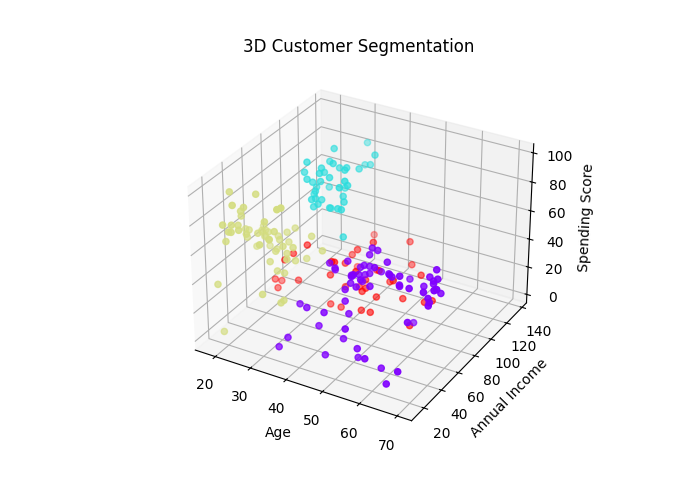

In [11]:
%matplotlib widget

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df['Cluster'], cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('3D Customer Segmentation')
plt.show()


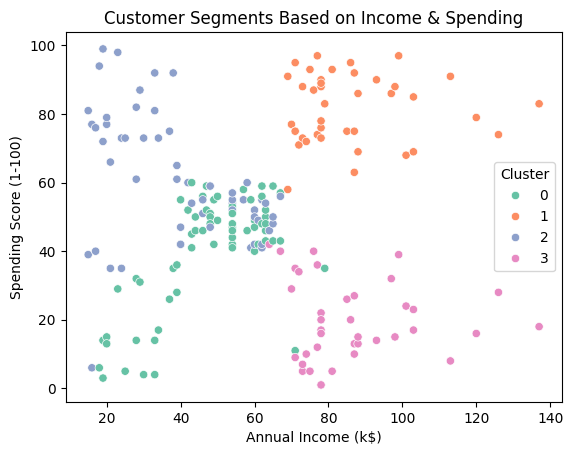

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title("Customer Segments Based on Income & Spending")
plt.show()


In [20]:
cluster_profiles = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print(cluster_profiles)


           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        53.98               47.71                   39.97
1        32.88               86.10                   81.53
2        25.44               40.00                   60.30
3        39.37               86.50                   19.58


In [ ]:
df['Cluster'].value_counts()

Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64